# Kazakhstan Climate Change Research Project
The main goal of this project is to analyze climate trends in Kazakhstan and compare them with selected
foreign regions (USA, Europe, Japan). This will allow us to detect anomalies, seasonal patterns, 
and possible global climate influences.

### Project Plan

1. Load historical weather data using Meteostat.
2. Select meteorological stations covering different regions of Kazakhstan.
3. Pre-load climate data from Europe, USA, and Japan meteostations.
4. Aggregate daily data into monthly and yearly summaries.
5. Visualize temperature, precipitation, and snow trends.
6. Detect anomalies and extreme events, and investigate their causes.
7. Compare Kazakhstan's climate with foreign regions.
8. Document results with charts, screenshots, and explanations in Markdown.

## 1. Load Kazakhstan Meteostat Data
- In this step, we fetch historical daily weather data for selected stations in Kazakhstan.
- The data includes temperature (avg, min, max), precipitation, snow, wind, and pressure.
- We store this data in a parquet file for later analysis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
kz_data= pd.read_parquet('df_Daily.parquet')
kz_data=kz_data.reset_index()
kz_meteostations_ref=pd.read_parquet('kz_meteostations_ref.parquet')
kz_meteostations_ref=kz_meteostations_ref.reset_index()

In [14]:
kz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392038 entries, 0 to 1392037
Data columns (total 13 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   time     1392038 non-null  datetime64[ns]
 1   temp     1382975 non-null  float64       
 2   dwpt     1373904 non-null  float64       
 3   rhum     1373904 non-null  float64       
 4   prcp     203992 non-null   float64       
 5   snow     0 non-null        float64       
 6   wdir     1359628 non-null  float64       
 7   wspd     1356750 non-null  float64       
 8   wpgt     0 non-null        float64       
 9   pres     1200715 non-null  float64       
 10  tsun     0 non-null        float64       
 11  coco     186547 non-null   float64       
 12  station  1392038 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 138.1+ MB


In [15]:
kz_data.notna().mean().mul(100).round(2)

time       100.00
temp        99.35
dwpt        98.70
rhum        98.70
prcp        14.65
snow         0.00
wdir        97.67
wspd        97.47
wpgt         0.00
pres        86.26
tsun         0.00
coco        13.40
station    100.00
dtype: float64

## Data completeness assessment (Kazakhstan)

Temperature, humidity, wind, and pressure variables show high completeness
(above 97%), making them suitable for long-term climate trend analysis.
Precipitation and weather condition codes are sparsely available and are
therefore only considered at aggregated temporal scales.
Snowfall, sunshine duration, and wind gust data are not available and are
excluded from further analysis.

In [ ]:
# Columns removed due to inefficiency of stored information
kz_data=kz_data.drop(columns=['prcp','snow','wpgt','tsun','coco'])

In [19]:
kz_data

,time,temp,dwpt,rhum,wdir,wspd,pres,station
0,1950-01-01 00:00:00,-2.2,-2.8,96.0,250.0,42.5,1022.6,38328
1,1950-01-01 06:00:00,-2.2,NaN,NaN,220.0,25.9,1027.0,38328
2,1950-01-01 12:00:00,-2.2,-3.9,88.0,0.0,0.0,1026.0,38328
3,1950-01-01 18:00:00,-3.9,-6.0,85.0,40.0,3.6,1023.9,38328
4,1950-01-02 00:00:00,-3.9,-11.2,57.0,90.0,11.2,1024.4,38328
...,...,...,...,...,...,...,...,...
1392033,2024-12-31 20:00:00,-11.9,-13.6,87.0,208.0,16.9,1025.0,35078
1392034,2024-12-31 21:00:00,-17.1,-19.7,80.0,220.0,10.8,1025.8,35078
1392035,2024-12-31 22:00:00,-11.7,-13.3,88.0,195.0,15.1,1024.2,35078
1392036,2024-12-31 23:00:00,-13.3,-15.6,83.0,215.0,16.2,1024.1,35078


In [12]:
kz_meteostations_ref

,id,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
0,35078,Atbasar,KZ,AKM,35078,None,51.8167,68.3667,308.0,Asia/Qyzylorda,1948-01-01,2025-04-02,1902-04-01,2025-08-23,1902-01-01,2021-01-01
1,35229,Aktjubinsk,KZ,AKT,35229,UATT,50.2833,57.1500,227.0,Asia/Aqtobe,1932-01-01,2025-12-09,1904-11-01,2025-08-24,1904-01-01,2022-01-01
2,35796,Balhash,KZ,KAR,35796,None,46.8000,75.0833,352.0,Asia/Almaty,1948-01-01,2025-04-02,1936-01-01,2025-08-23,1936-01-01,2021-01-01
3,36177,Semipalatinsk,KZ,VOS,36177,UASS,50.4167,80.3000,196.0,Asia/Almaty,1932-01-01,2025-12-09,1901-11-01,2025-08-24,1901-01-01,2022-01-01
4,36859,Panfilov,KZ,ALM,36859,None,44.1667,80.0667,640.0,Asia/Almaty,1946-01-14,2025-04-02,1891-02-01,2025-08-23,1891-01-01,2021-01-01
5,38328,Shymkent,KZ,YUZ,38328,UAII,42.3167,69.7000,552.0,Asia/Qyzylorda,1948-01-01,2025-12-09,1948-01-01,2025-08-24,1949-01-01,2022-01-01


In [27]:
kz = pd.merge(kz_data, kz_meteostations_ref, left_on=['station'],right_on=['id'], how='inner')

In [28]:
kz=kz.drop(columns=['id','hourly_start','hourly_end','daily_start','daily_end','monthly_start','monthly_end','timezone','icao'])

In [29]:
kz 

,time,temp,dwpt,rhum,wdir,wspd,pres,station,name,country,region,wmo,latitude,longitude,elevation
0,1950-01-01 00:00:00,-2.2,-2.8,96.0,250.0,42.5,1022.6,38328,Shymkent,KZ,YUZ,38328,42.3167,69.7000,552.0
1,1950-01-01 06:00:00,-2.2,NaN,NaN,220.0,25.9,1027.0,38328,Shymkent,KZ,YUZ,38328,42.3167,69.7000,552.0
2,1950-01-01 12:00:00,-2.2,-3.9,88.0,0.0,0.0,1026.0,38328,Shymkent,KZ,YUZ,38328,42.3167,69.7000,552.0
3,1950-01-01 18:00:00,-3.9,-6.0,85.0,40.0,3.6,1023.9,38328,Shymkent,KZ,YUZ,38328,42.3167,69.7000,552.0
4,1950-01-02 00:00:00,-3.9,-11.2,57.0,90.0,11.2,1024.4,38328,Shymkent,KZ,YUZ,38328,42.3167,69.7000,552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392033,2024-12-31 20:00:00,-11.9,-13.6,87.0,208.0,16.9,1025.0,35078,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0
1392034,2024-12-31 21:00:00,-17.1,-19.7,80.0,220.0,10.8,1025.8,35078,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0
1392035,2024-12-31 22:00:00,-11.7,-13.3,88.0,195.0,15.1,1024.2,35078,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0
1392036,2024-12-31 23:00:00,-13.3,-15.6,83.0,215.0,16.2,1024.1,35078,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0


In [68]:
kz['date'] = kz['time'].dt.date
daily_kz = (
    kz
    .groupby(['station', 'date'])
    .agg({
        'temp': 'mean',      
        'dwpt': 'mean',
        'rhum': 'mean',
        'wspd': 'mean',
        'wdir': 'mean',      # (wind directions in degree, when aggregated give us average wind direction in degree from 0:360) 
        'pres': 'mean',

        # static columns
        'name': 'first',
        'country': 'first',
        'region': 'first',
        'wmo': 'first',
        'latitude': 'first',
        'longitude': 'first',
        'elevation': 'first'
    })
    .reset_index()
)

```
Wind direction values were averaged arithmetically for exploratory purposes only.
Due to the circular nature of wind direction data, such averaging does not always
produce physically meaningful results and is therefore not used for detailed
directional analysis.

For example:
- 08:00 — wind direction = 180° (southerly wind)
- 20:00 — wind direction = 0° (northerly wind)

An arithmetic mean gives:
(180° + 0°) / 2 = 90° (easterly wind),

which is physically incorrect in this context.  
As a result, averaged wind direction values are treated as approximate indicators
and excluded from any quantitative conclusions.



In [37]:
daily_kz.head(8)

,station,date,temp,dwpt,rhum,wspd,wdir,pres,name,country,region,wmo,latitude,longitude,elevation
0,35078,1950-01-01,-14.300000,-15.733333,74.333333,14.800,160.000000,1015.775,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0
1,35078,1950-01-02,-11.100000,-11.466667,97.000000,32.500,167.500000,1016.175,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0
2,35078,1950-01-03,-16.650000,-22.066667,59.666667,16.100,206.666667,1015.725,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0
3,35078,1950-01-04,-25.733333,-26.150000,95.000000,27.700,206.666667,1026.800,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0
4,35078,1950-01-05,-17.500000,-19.875000,82.000000,26.825,155.000000,1022.300,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0
5,35078,1950-01-06,-13.750000,-14.766667,89.000000,20.000,127.500000,1014.050,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0
6,35078,1950-01-07,-4.633333,-3.050000,100.000000,20.800,157.500000,1001.200,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0
7,35078,1950-01-08,-10.400000,-11.375000,92.750000,45.000,190.000000,1009.750,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0


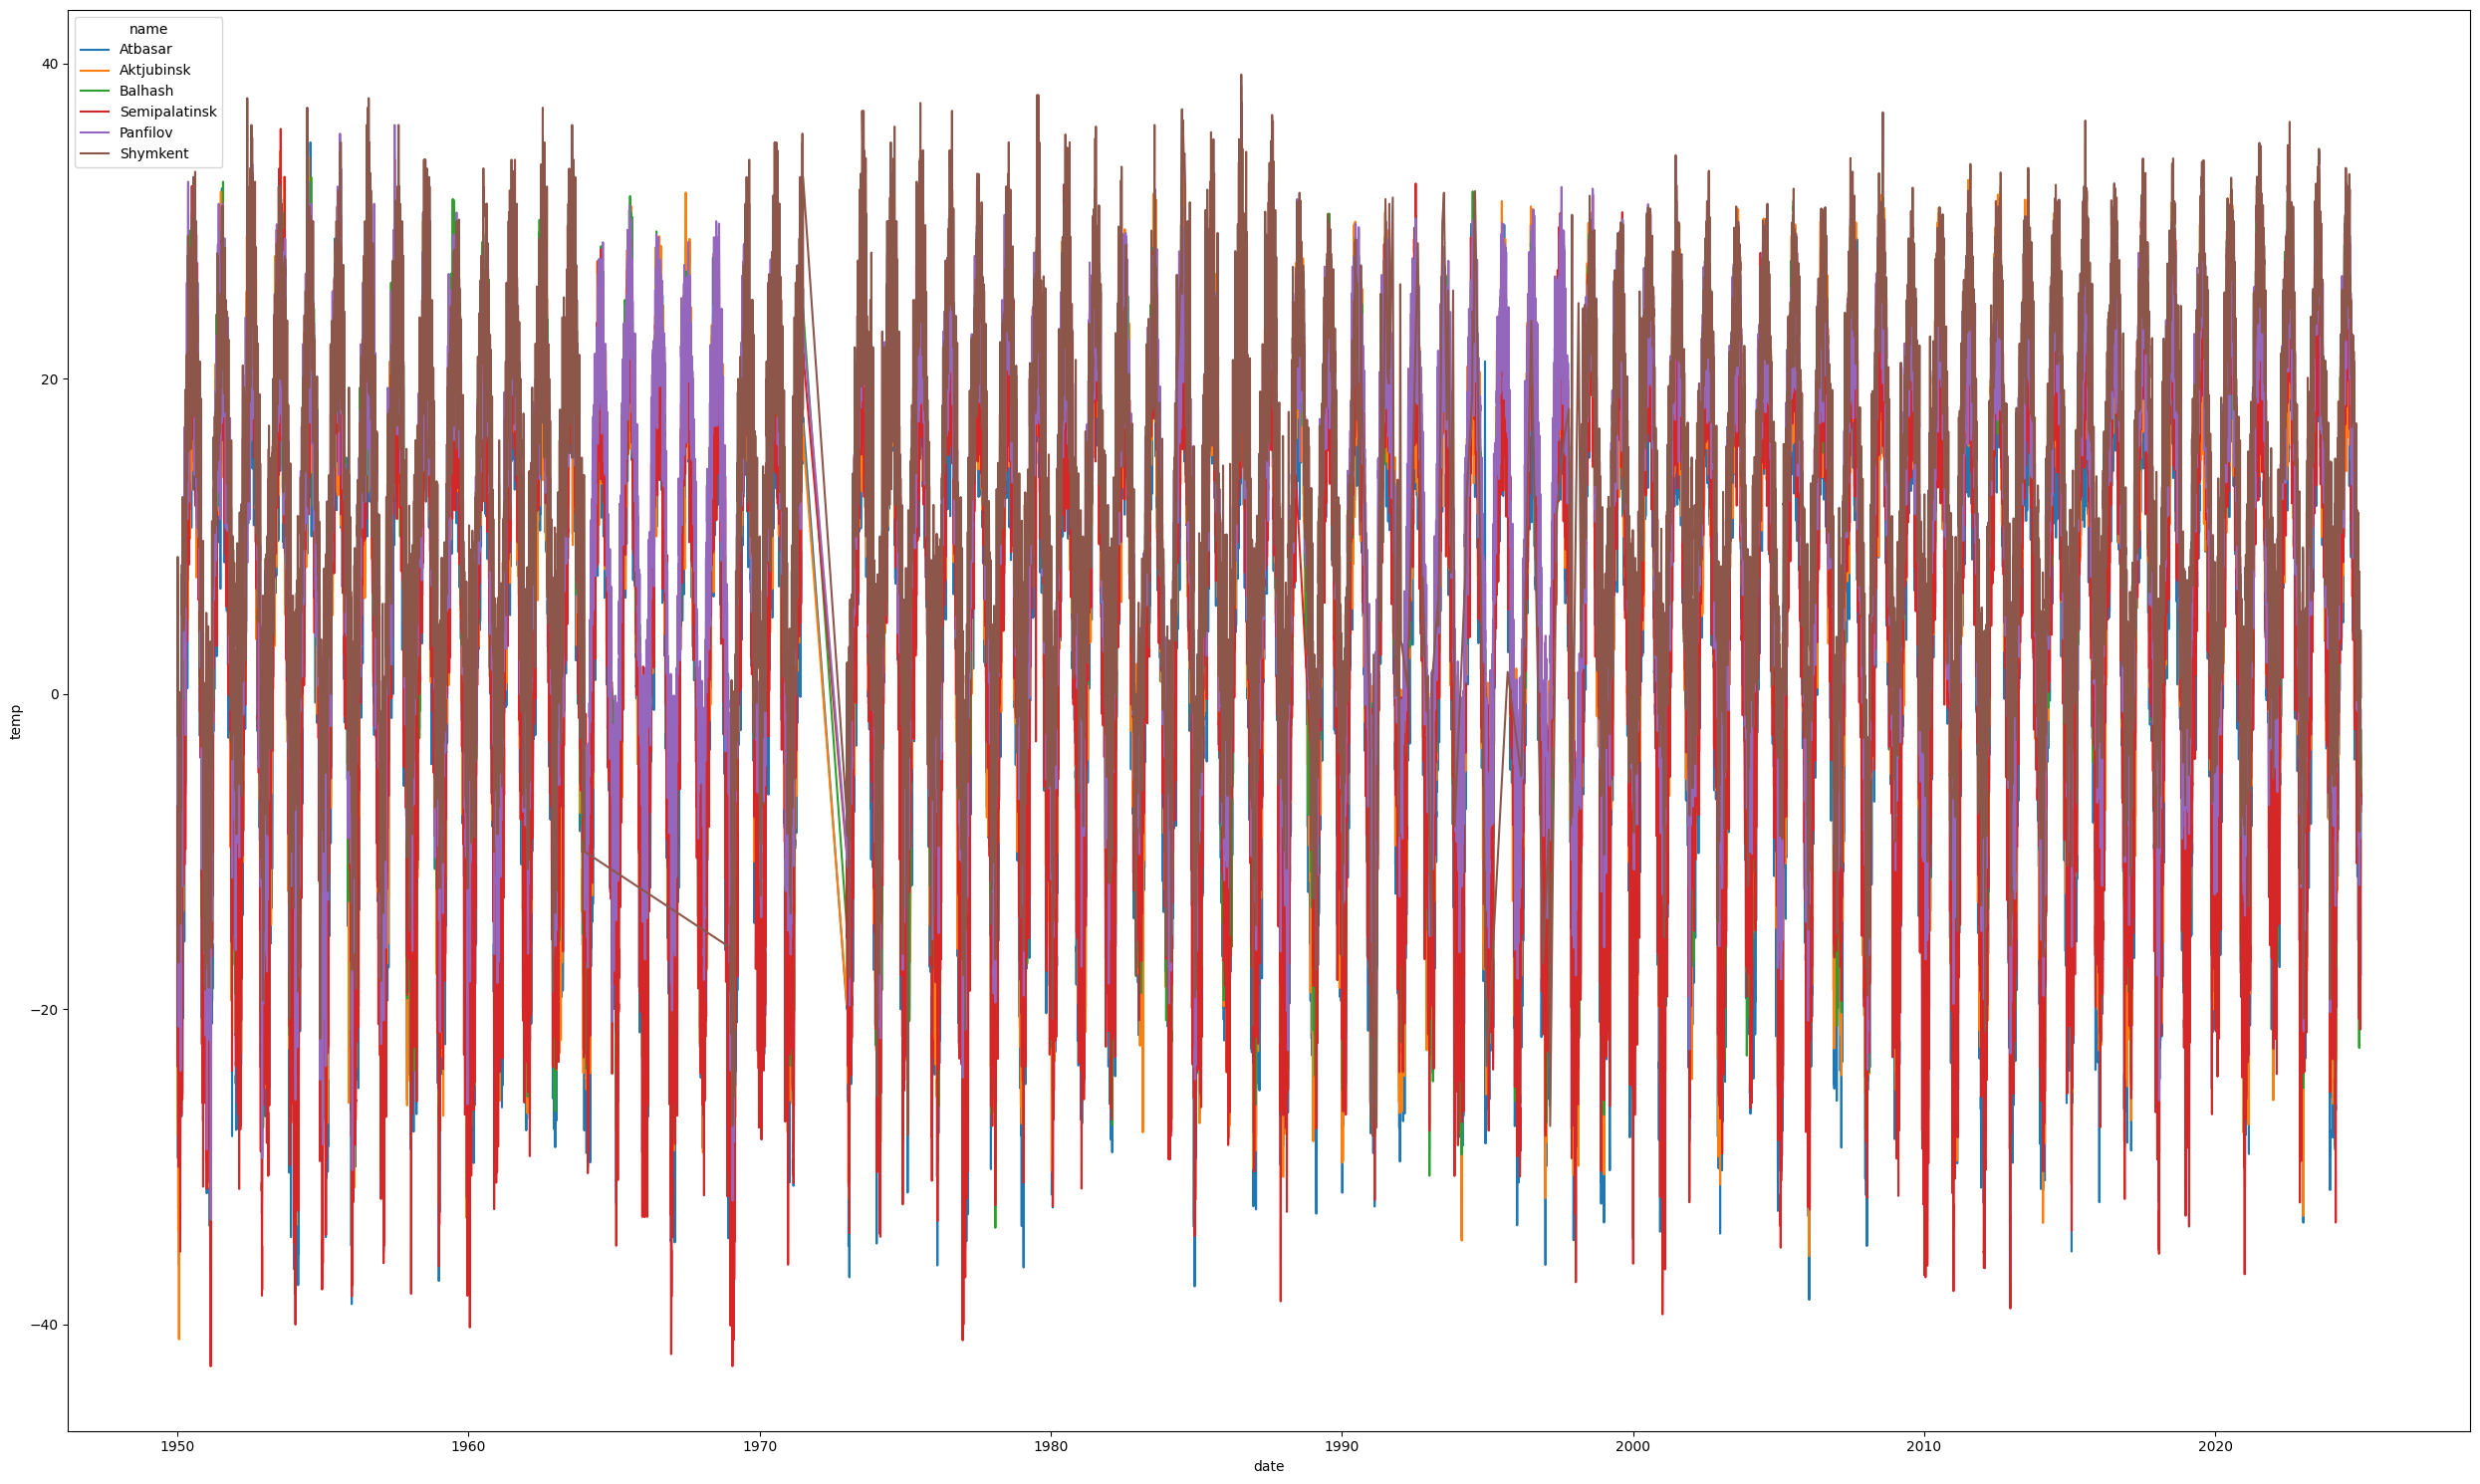

In [54]:
fr=plt.figure(figsize=(25, 15))
fr=sns.lineplot(x="date", y="temp",
             hue="name", 
             data=daily_kz)
plt.tight_layout()
plt.show()


Daily temperature series over long time spans are dominated by seasonal variability, which obscures long-term trends.

In [70]:
daily_kz['year'] = pd.to_datetime(daily_kz['date']).dt.year
daily_kz['month'] = pd.to_datetime(daily_kz['date']).dt.month
daily_kz['year-month'] = daily_kz['year-month'] = daily_kz['date'].apply(lambda x: f"{x.year}-{x.month:02d}")

In [58]:
daily_kz

,station,date,temp,dwpt,rhum,wspd,wdir,pres,name,country,region,wmo,latitude,longitude,elevation,year,month,year-month
0,35078,1950-01-01,-14.300000,-15.733333,74.333333,14.800,160.000000,1015.775000,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0,1950,1,1950-01
1,35078,1950-01-02,-11.100000,-11.466667,97.000000,32.500,167.500000,1016.175000,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0,1950,1,1950-01
2,35078,1950-01-03,-16.650000,-22.066667,59.666667,16.100,206.666667,1015.725000,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0,1950,1,1950-01
3,35078,1950-01-04,-25.733333,-26.150000,95.000000,27.700,206.666667,1026.800000,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0,1950,1,1950-01
4,35078,1950-01-05,-17.500000,-19.875000,82.000000,26.825,155.000000,1022.300000,Atbasar,KZ,AKM,35078,51.8167,68.3667,308.0,1950,1,1950-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154445,38328,2024-12-28,0.120833,-6.091667,64.916667,5.700,106.250000,1025.179167,Shymkent,KZ,YUZ,38328,42.3167,69.7000,552.0,2024,12,2024-12
154446,38328,2024-12-29,4.037500,-2.945833,61.750000,9.600,141.875000,1017.358333,Shymkent,KZ,YUZ,38328,42.3167,69.7000,552.0,2024,12,2024-12
154447,38328,2024-12-30,2.966667,1.787500,92.041667,10.050,207.875000,1023.358333,Shymkent,KZ,YUZ,38328,42.3167,69.7000,552.0,2024,12,2024-12
154448,38328,2024-12-31,1.750000,0.595833,92.125000,5.550,171.250000,1026.041667,Shymkent,KZ,YUZ,38328,42.3167,69.7000,552.0,2024,12,2024-12


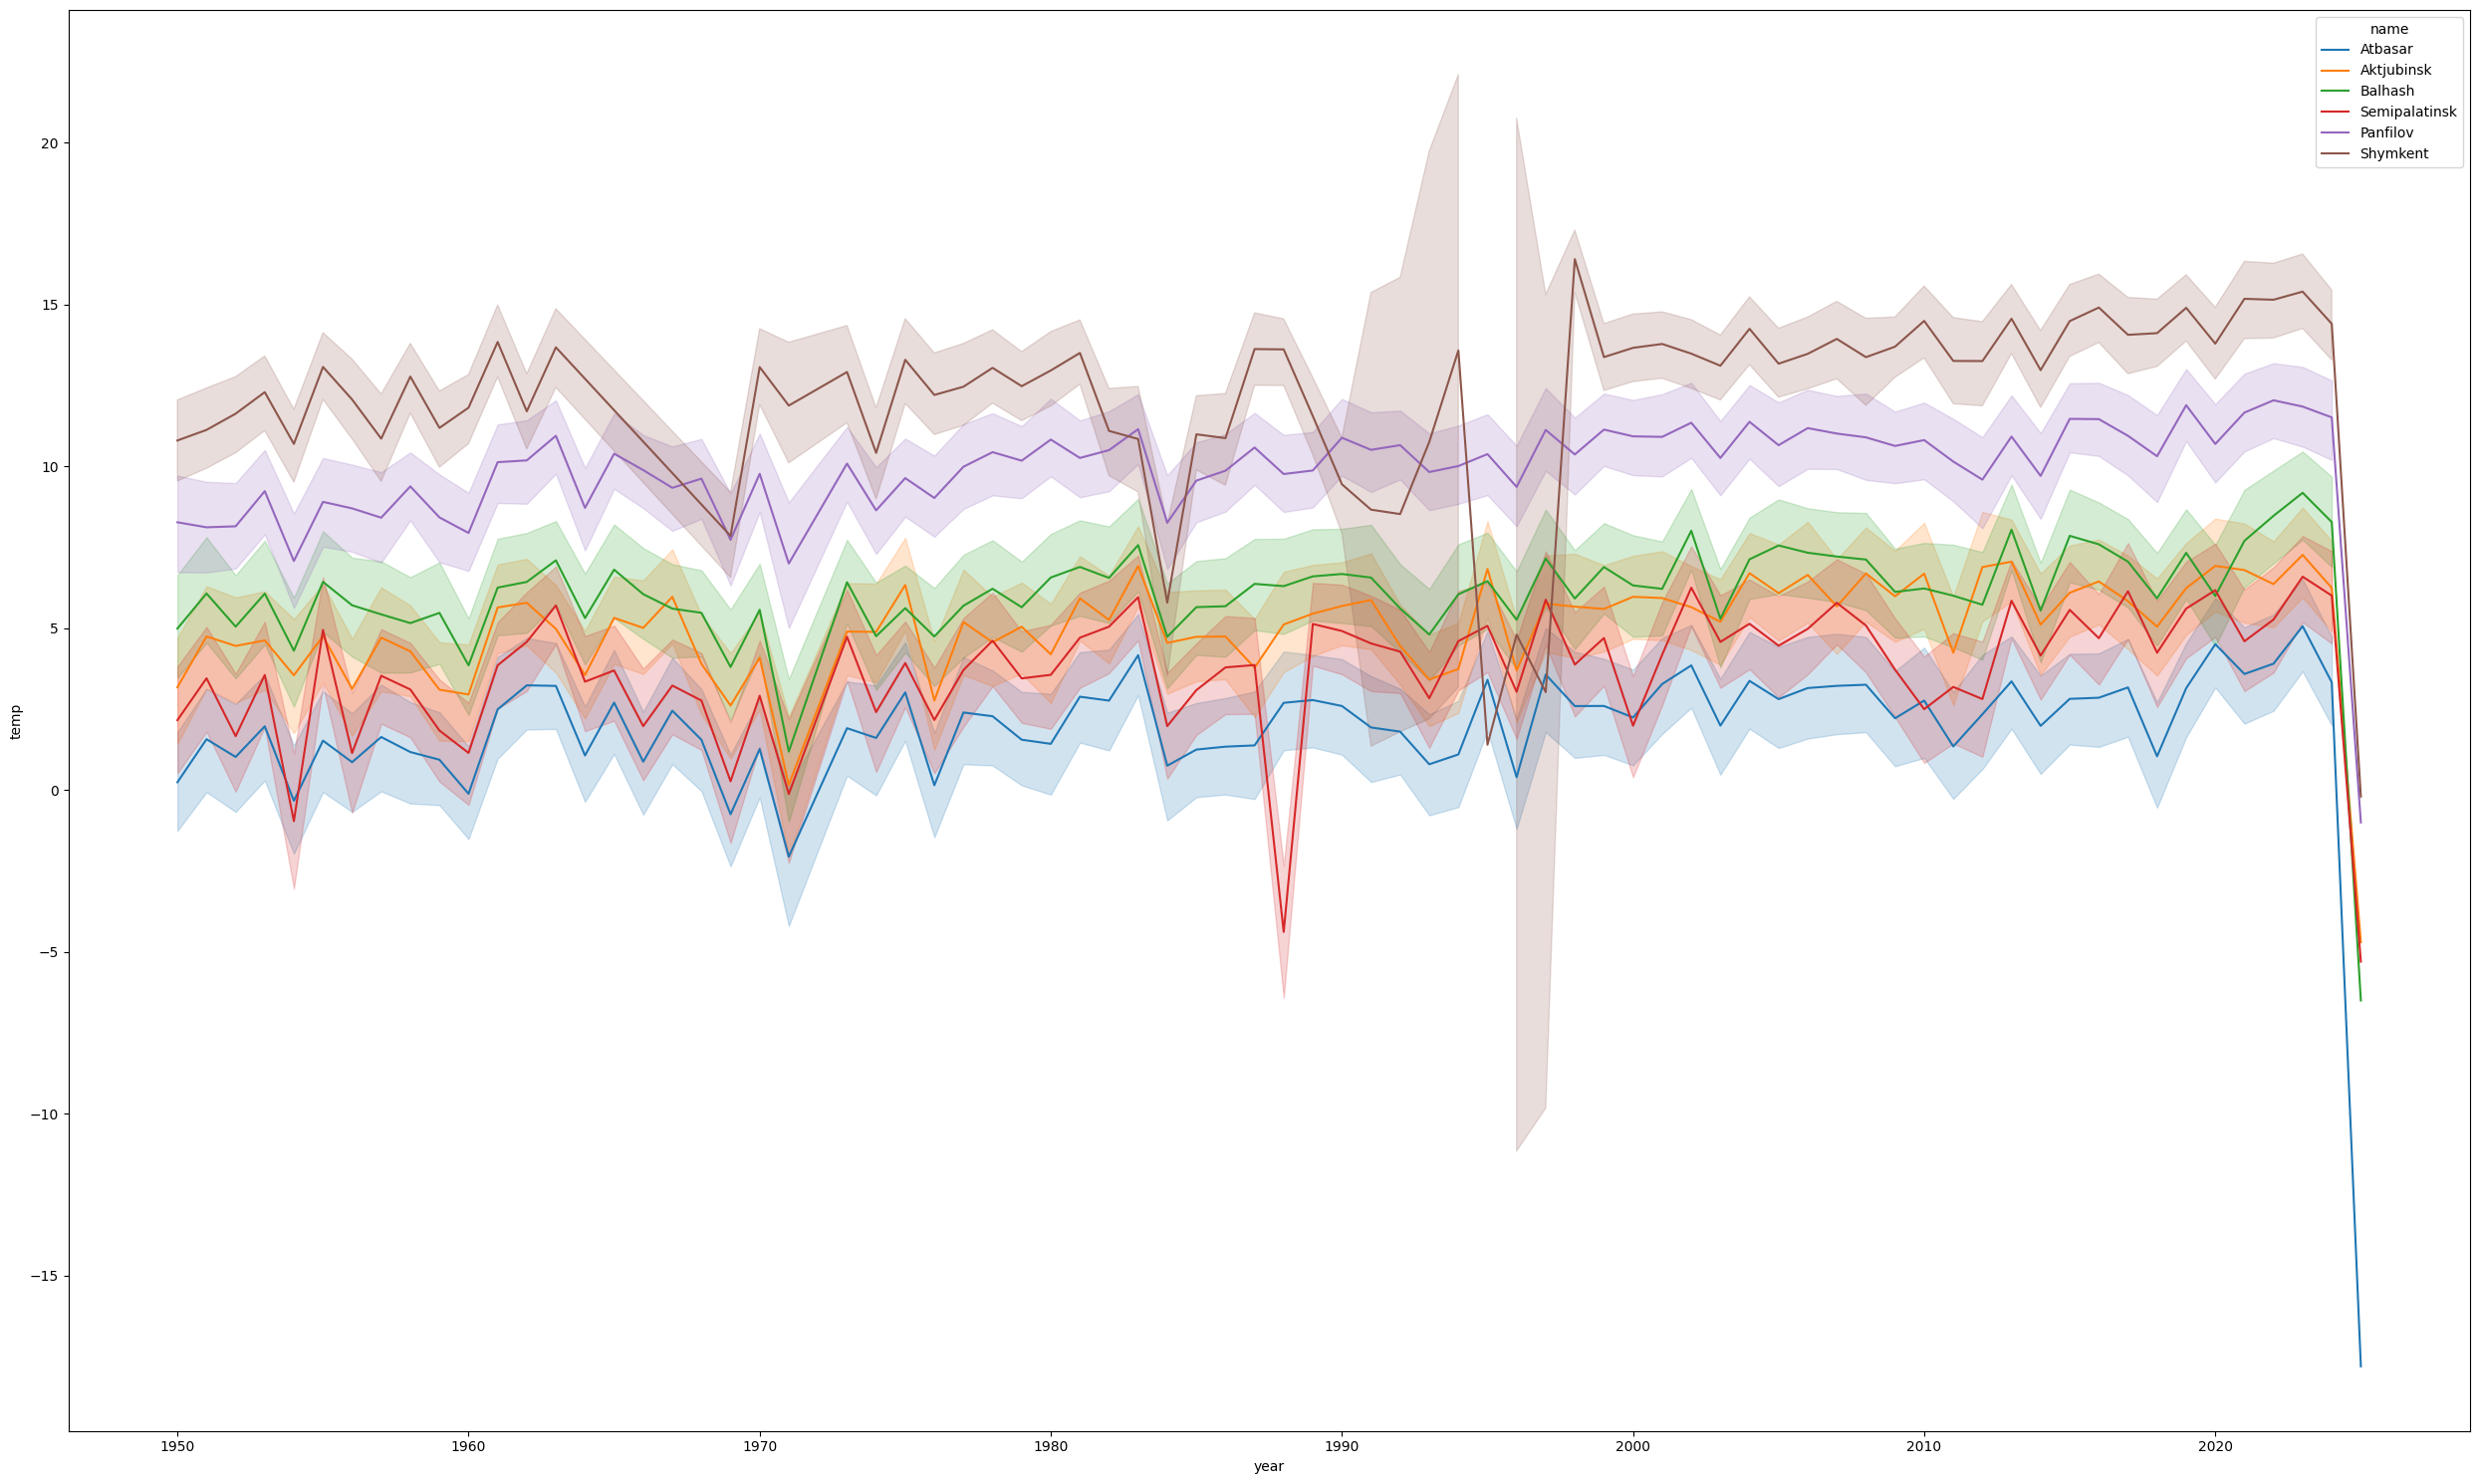

In [63]:
fr=plt.figure(figsize=(25, 15))
fr=sns.lineplot(x="year", y="temp",
             hue="name",estimator='mean', 
             data=daily_kz)
plt.tight_layout()
plt.show()

In [71]:
#filter dataframe due to inefficiency of stored information (year <2024)
daily_kz=daily_kz[daily_kz['year']<=2024]

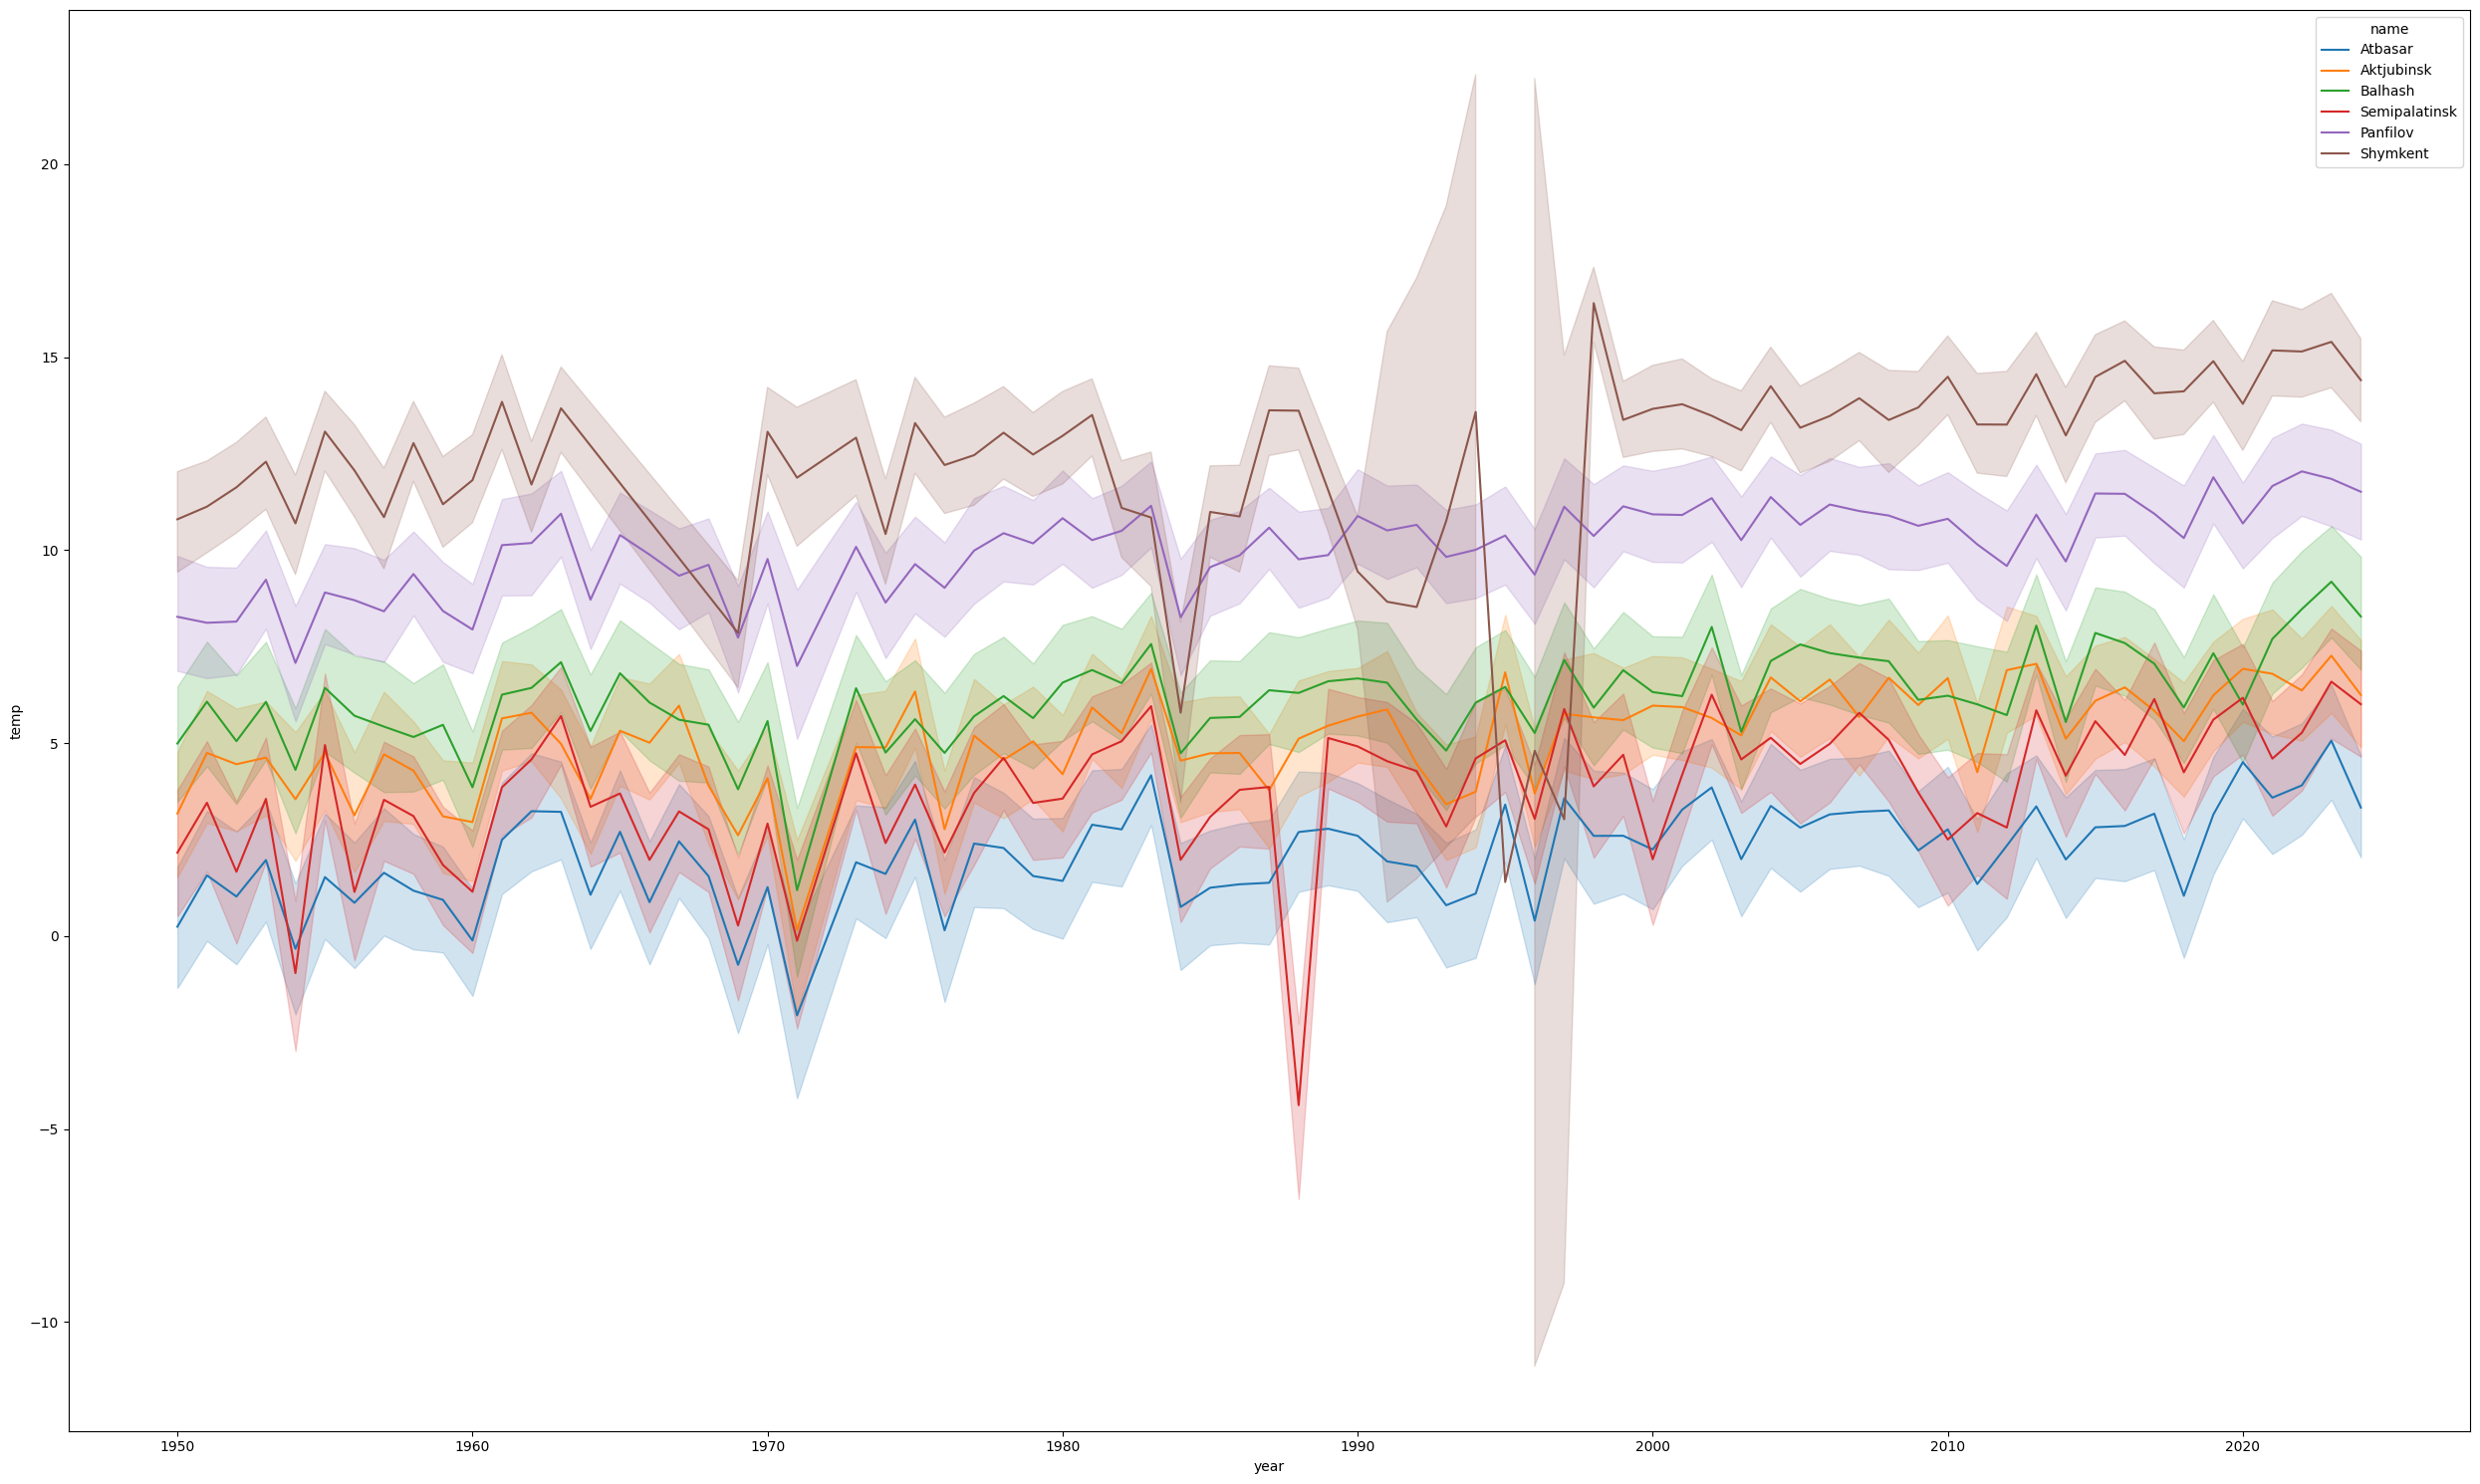

In [73]:
fr=plt.figure(figsize=(25, 15))
fr=sns.lineplot(x="year", y="temp",
             hue="name",estimator='mean', 
             data=daily_kz)
plt.tight_layout()
plt.show()

In [84]:
daily_kz_yearly = daily_kz.groupby(['year','name'])['temp'].mean().reset_index()
daily_kz_yearly['temp_smooth'] = daily_kz_yearly.groupby('name')['temp'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

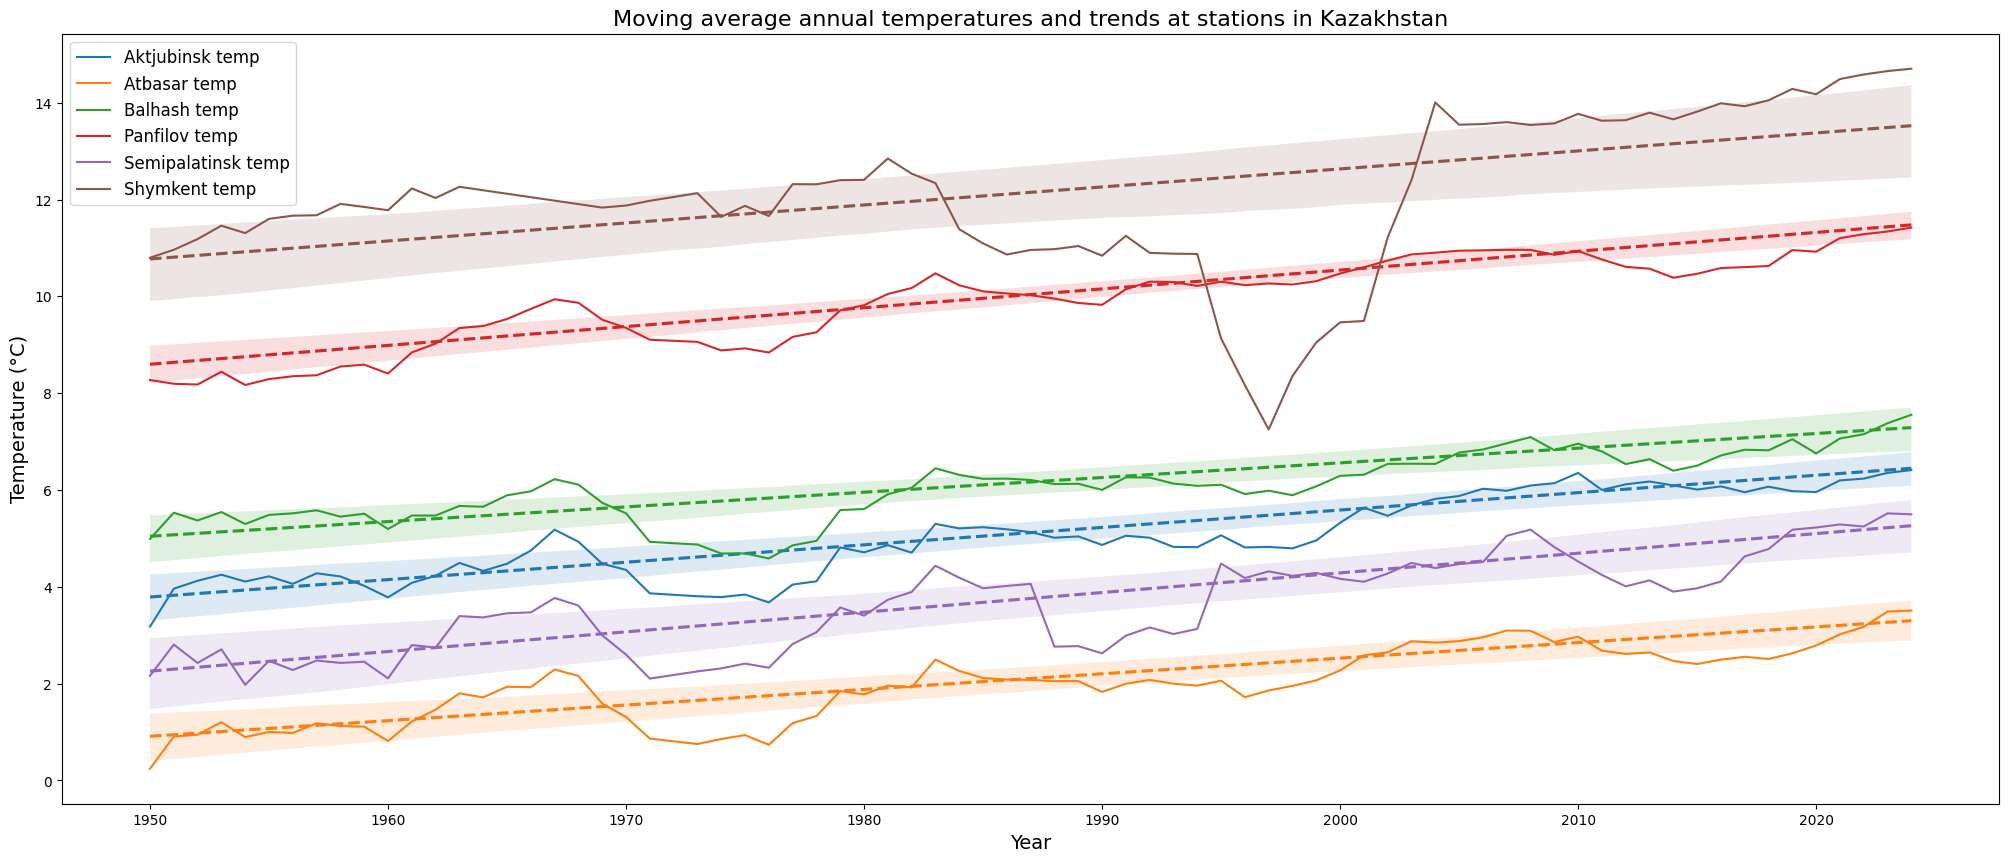

In [91]:
plt.figure(figsize=(25,10))
colors = sns.color_palette(n_colors=len(daily_kz_yearly['name'].unique()))
for i, station in enumerate(daily_kz_yearly['name'].unique()):
    subset = daily_kz_yearly[daily_kz_yearly['name']==station]
    
    # Сглаженные температуры
    sns.lineplot(x='year', y='temp_smooth', data=subset, color=colors[i], label=f'{station} temp')
    
    # Линейный тренд
    sns.regplot(
        x='year', y='temp', data=subset, scatter=False, ax=plt.gca(), color=colors[i],
        line_kws={'linestyle':'--', 'label': f'{station} trend'}
    )

# Настроим легенду: убираем дублирование
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=12, loc='upper left')

plt.title('Moving average annual temperatures and trends at stations in Kazakhstan', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.show()

On this graph we clearly see a trend of increasing temperature, so far it is a linear trend, in the next step I will check it for non-linearity

In [96]:
import pandas as pd
from scipy.stats import linregress


trend_table = []

for station in daily_kz_yearly['name'].unique():
    subset = daily_kz_yearly[daily_kz_yearly['name'] == station]
    
    
    slope, intercept, r_value, p_value, std_err = linregress(subset['year'], subset['temp'])
    
    
    temp_change = slope * (subset['year'].max() - subset['year'].min())
    
    trend_table.append({
        'station': station,
        'start_year': subset['year'].min(),
        'end_year': subset['year'].max(),
        'temp_change_C': temp_change,
        'slope_C_per_year': slope,
        'r_squared': r_value**2
    })


trend_df = pd.DataFrame(trend_table)


trend_df

,station,start_year,end_year,temp_change_C,slope_C_per_year,r_squared
0,Aktjubinsk,1950,2024,2.659372,0.035937,0.363718
1,Atbasar,1950,2024,2.387302,0.032261,0.310891
2,Balhash,1950,2024,2.244281,0.030328,0.303592
3,Panfilov,1950,2024,2.878126,0.038894,0.549803
4,Semipalatinsk,1950,2024,3.004910,0.040607,0.235039
5,Shymkent,1950,2024,2.753459,0.037209,0.089476


The table shows absolute values; for example, for the station in Semipalatinsk (Semey), the absolute increase was 3 degrees over the entire period; warming is occurring at an average rate of 0.04 degrees per year.

In [116]:
from sklearn.linear_model import LinearRegression

trend_tables = {}

for station in daily_kz_yearly['name'].unique():
    subset = daily_kz_yearly[daily_kz_yearly['name'] == station].copy()
    
    X = subset['year'].values.reshape(-1, 1)
    y = subset['temp'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    subset['temp_trend'] = model.predict(X)
    
    trend_tables[station] = subset[['year', 'temp', 'temp_trend']]

trend_tables['Atbasar'].head(10)

,year,temp,temp_trend
1,1950,0.241393,0.912042
7,1951,1.571027,0.944303
13,1952,1.023497,0.976564
19,1953,1.968967,1.008825
25,1954,-0.330594,1.041086
31,1955,1.526847,1.073346
37,1956,0.861481,1.105607
43,1957,1.639007,1.137868
49,1958,1.175069,1.170129
55,1959,0.937509,1.202390


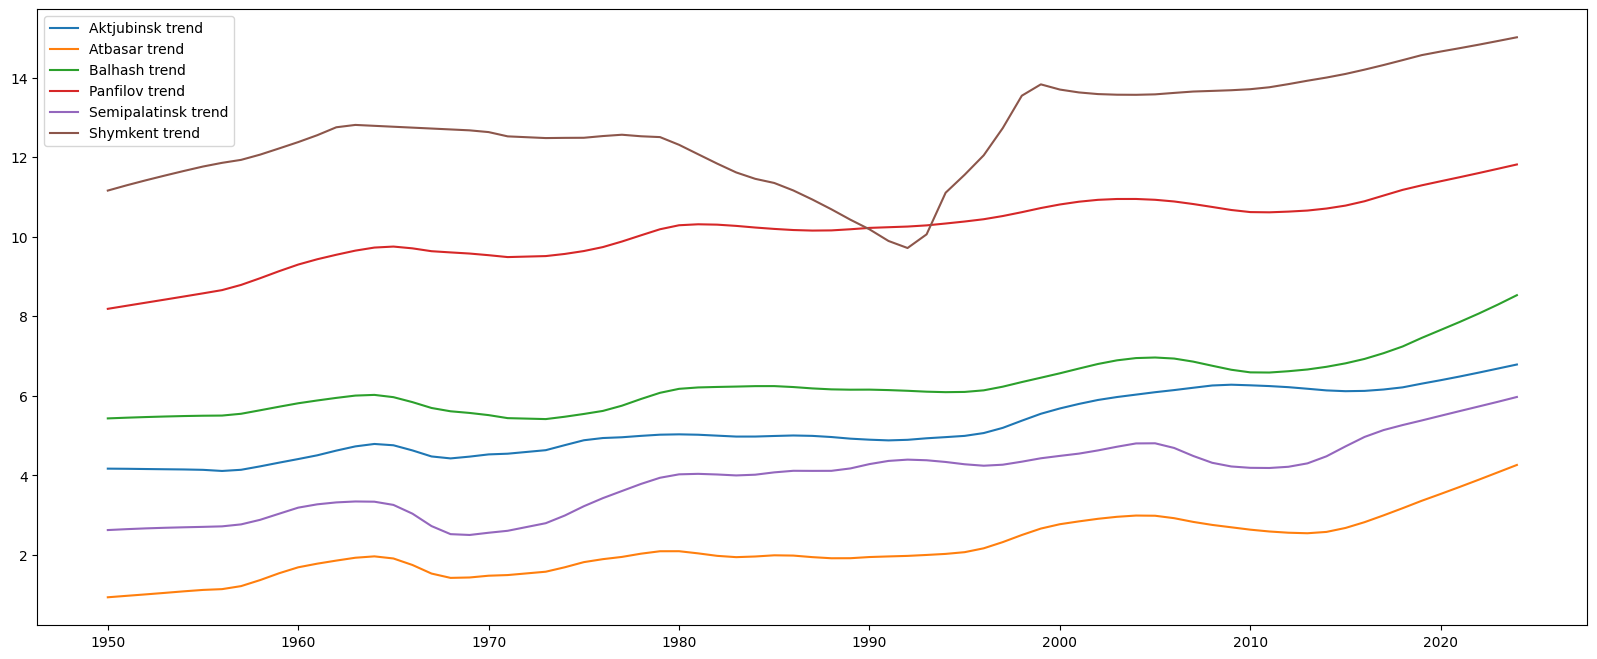

In [118]:
import statsmodels.api as sm
plt.figure(figsize=(20,8))
for station in daily_kz_yearly['name'].unique():
    subset = daily_kz_yearly[daily_kz_yearly['name'] == station]
    lowess = sm.nonparametric.lowess(subset['temp'], subset['year'], frac=0.2)
    plt.plot(lowess[:,0], lowess[:,1], label=f'{station} trend')
plt.legend()
plt.show()

When checking for non-linearity, it is clear that heating has been accelerating recently.

In [107]:
from numpy.polynomial.polynomial import Polynomial
import numpy as np

x = subset['year'].values
y = subset['temp'].values
p = Polynomial.fit(x, y, 2)  # степень 2
y_fit = p(x)

In [108]:
y_fit

array([12.62164914, 12.50705027, 12.39662208, 12.29036457, 12.18827774,
       12.09036159, 11.99661611, 11.90704131, 11.8216372 , 11.74040376,
       11.66334099, 11.59044891, 11.5217275 , 11.45717678, 11.15745666,
       11.12210068, 11.09091538, 11.04105682, 11.02238355, 11.00788096,
       10.99754906, 10.99138783, 10.98939727, 10.9915774 , 10.9979282 ,
       11.00844969, 11.02314185, 11.04200469, 11.06503821, 11.0922424 ,
       11.12361728, 11.15916283, 11.19887906, 11.24276597, 11.29082356,
       11.34305183, 11.39945077, 11.4600204 , 11.5247607 , 11.59367168,
       11.66675334, 11.74400567, 11.82542869, 11.91102238, 12.00078675,
       12.0947218 , 12.19282753, 12.29510394, 12.40155102, 12.51216879,
       12.62695723, 12.74591635, 12.86904614, 12.99634662, 13.12781778,
       13.26345961, 13.40327212, 13.54725531, 13.69540918, 13.84773373,
       14.00422895, 14.16489486, 14.32973144, 14.4987387 , 14.67191664,
       14.84926525, 15.03078455, 15.21647452, 15.40633517])

In [119]:
p2 = p.convert() 
p2

Polynomial([ 8.16965805e+03, -8.24950697e+00,  2.08533917e-03], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

This is a quadratic approximation of temperature.

The constant (8169.658) is simply a shift in the graph and says little about the trend on its own.

The linear coefficient (-8.2495) is responsible for the overall trend of temperature change over the years. A negative value here indicates that, with a zero quadratic term, the first years were "pulling down," but with the quadratic term, the final curve rises (see the next point).

The quadratic coefficient (0.00208534) is the key to acceleration. A positive value means that the temperature increase is accelerating over time. That is, the warming is intensifying, not simply increasing linearly.

Conclusion: even if the initial increase was weak or almost zero, the temperature has been rising faster in recent years, and the graph is becoming increasingly steep.

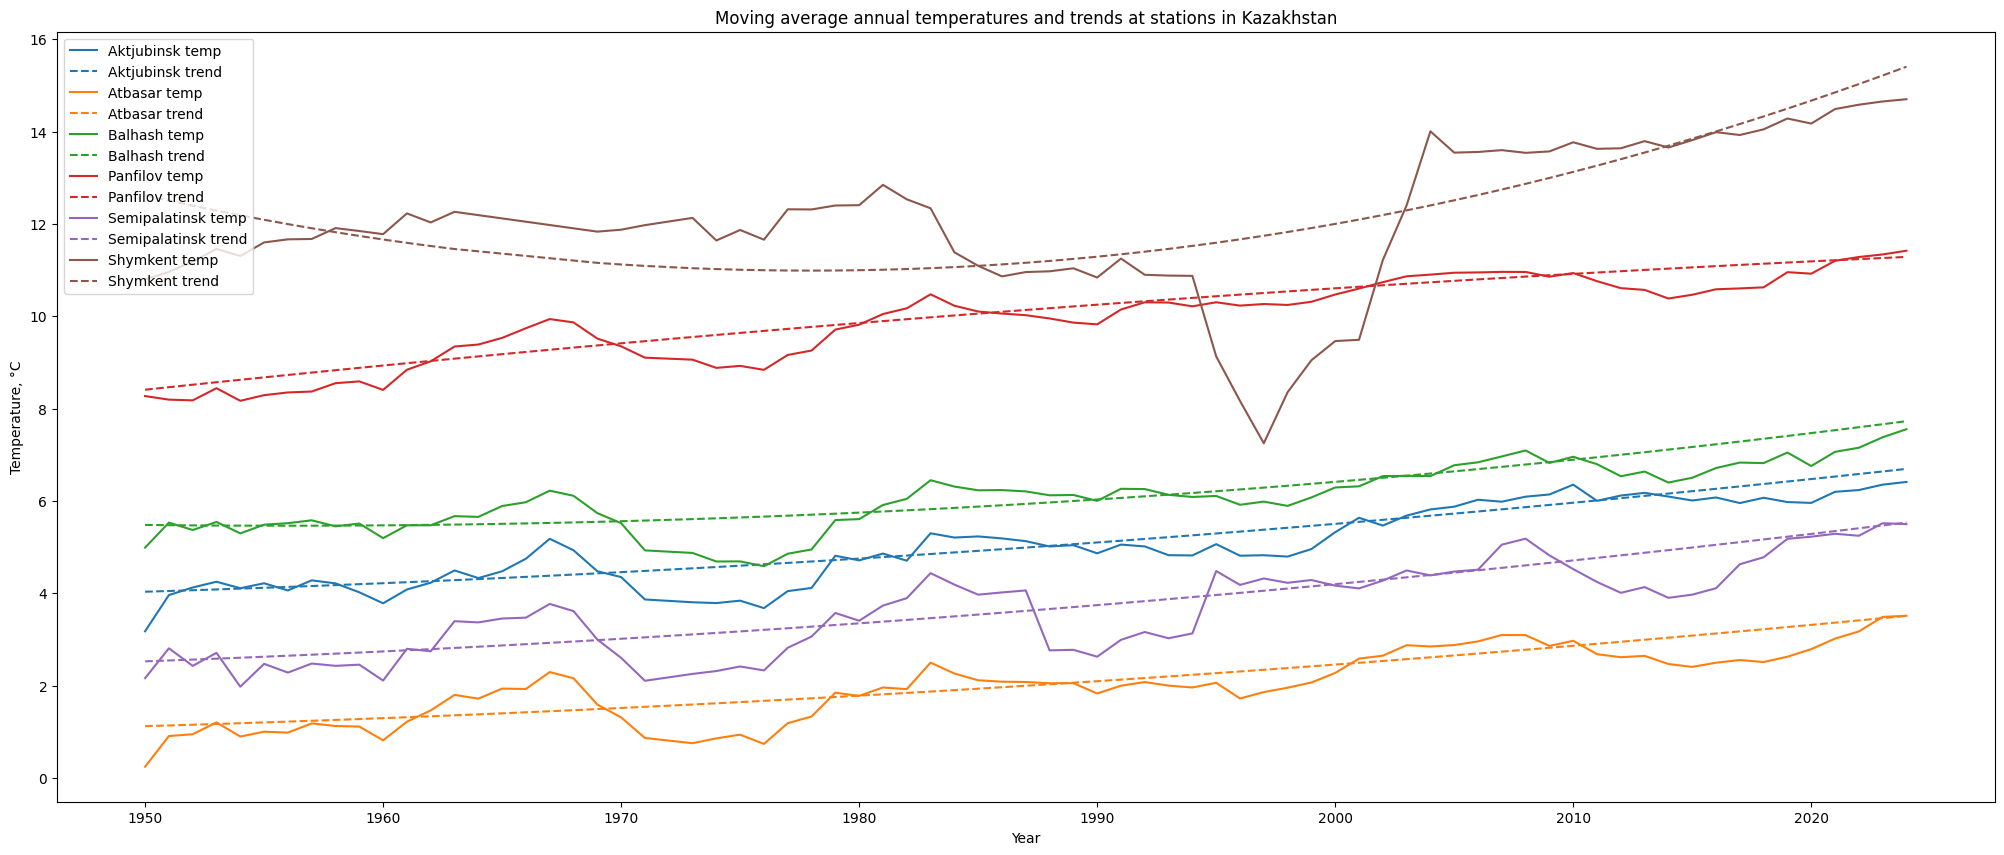

In [120]:
from numpy.polynomial.polynomial import Polynomial

plt.figure(figsize=(25,10))

colors = plt.cm.tab10.colors  

for i, station in enumerate(daily_kz_yearly['name'].unique()):
    subset = daily_kz_yearly[daily_kz_yearly['name']==station]
    
    plt.plot(subset['year'], subset['temp_smooth'], label=f'{station} temp', color=colors[i])
    
    x = subset['year'].values
    y = subset['temp'].values
    p = Polynomial.fit(x, y, 2)
    y_fit = p(x)
    
    plt.plot(x, y_fit, linestyle='--', color=colors[i], label=f'{station} trend')

plt.title('Moving average annual temperatures and trends at stations in Kazakhstan')
plt.xlabel('Year')
plt.ylabel('Temperature, °C')
plt.legend()
plt.show()

In [121]:

results = []

for station in daily_kz_yearly['name'].unique():
    subset = daily_kz_yearly[daily_kz_yearly['name'] == station]
    
    x = subset['year'].values
    y = subset['temp'].values
    
    p = Polynomial.fit(x, y, 2)
    
    a0, a1, a2 = p.convert().coef
    
    start_year = x.min()
    end_year = x.max()
    start_rate = a1 + 2 * a2 * start_year
    end_rate = a1 + 2 * a2 * end_year
    
    temp_change = y[-1] - y[0]
    
    results.append({
        'station': station,
        'a0': a0,
        'a1_C_per_year': a1,
        'a2_C_per_year2': a2,
        'temp_change_C': temp_change,
        'start_rate_C_per_year': start_rate,
        'end_rate_C_per_year': end_rate,
        'start_year': start_year,
        'end_year': end_year
    })
trend_df = pd.DataFrame(results)

trend_df

,station,a0,a1_C_per_year,a2_C_per_year2,temp_change_C,start_rate_C_per_year,end_rate_C_per_year,start_year,end_year
0,Aktjubinsk,1011.947282,-1.049512,0.000273,3.070343,0.015754,0.056179,1950,2024
1,Atbasar,857.482767,-0.893370,0.000233,3.086714,0.015049,0.049522,1950,2024
2,Balhash,1872.280190,-1.908935,0.000488,3.290555,-0.005732,0.066492,1950,2024
3,Panfilov,-900.173424,0.877394,-0.000211,3.239852,0.054485,0.023257,1950,2024
4,Semipalatinsk,1105.940588,-1.150174,0.000300,3.846286,0.018465,0.062813,1950,2024
5,Shymkent,8169.658046,-8.249507,0.002085,3.604137,-0.116684,0.191946,1950,2024


```
- a1_C_per_year is the linear component. If the changes were strictly linear, this value would indicate the rate of warming in °C/year.

For example, for Shymkent, -8.25 seems odd at first glance, but we're looking at it in conjunction with the quadratic term.

- a2_C_per_year2 is the quadratic component, which indicates the acceleration of warming:

A positive value indicates the rate of warming is increasing over time (heating is accelerating).

A negative value indicates the rate of warming is slowing.

For Shymkent, 0.002085 indicates accelerating warming, meaning that recent years have seen more warming than previously.

- start_rate_C_per_year / end_rate_C_per_year — the warming rate at the beginning and end of the period:

Shymkent example:

- start_rate = -0.1167 °C/year → even slight cooling in the 1950s

- end_rate = 0.1919 °C/year → by 2024, warming has accelerated and is almost twice the average change at other stations

- temp_change_C — the actual total warming over the period:

Balkhash +3.29 °C, Semipalatinsk +3.85 °C → over 74 years, the average warming is about 0.04–0.05 °C/year, but with acceleration

To do:
 1. Season count by year by stations: winter day count, autmn count
 2. Count "Sum of active temperatures by year"
      

## 2. Load Foreign Meteostat Data
- Here we fetch historical daily weather data from selected stations in USA, Europe, and Japan.
- This will allow comparative analysis between Kazakhstan and foreign regions.
- Data will also be saved as parquet for faster access in analysis steps.

## 3. Aggregate Daily Data
- Aggregate daily measurements to monthly and yearly summaries.
- This helps visualize long-term trends and reduces noise in daily fluctuations.
- Calculations include average temperature, sum of precipitation and snow, min/max temperatures.


## 4. Visualize Climate Trends
- Create line plots, heatmaps, and boxplots to visualize trends over years and months.
- Analyze temperature, precipitation, and snow patterns.
- Compare Kazakhstan with selected stations from USA, Europe, and Japan.

## 5. Detect and Explain Anomalies
- Identify extreme events or anomalies (e.g., unusually cold winters, heat waves).
- Investigate possible reasons using historical records, such as cyclones, anti-cyclones, 
- El Niño/La Niña events.
- Document findings with MD explanations and screenshots.

## 6. Comparative Analysis
- Compare climate trends in Kazakhstan with foreign stations.
- Look for similarities, differences, and possible drivers of changes.
- Include visual comparisons, charts, and interpretations.